In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
A_mat = [[7,4],[4,13]]
print (A_mat)

[[7, 4], [4, 13]]


In [37]:
eigenvalues_arr , eigenvectors_vec = np.linalg.eig(A_mat)
print ("Eigen Values:", eigenvalues_arr ,"\nEigen Vectors:", eigenvectors_vec )

Eigen Values: [ 5. 15.] 
Eigen Vectors: [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


In [38]:
x_vec = np.array ([3,1])
coeff = np.linalg.solve(eigenvectors_vec, x_vec) # Solves the linear combination equation x = au1 + bu2
print ( "Coefficients a and b are:", coeff )

Coefficients a and b are: [-2.23606798 -2.23606798]


In [39]:
reconstruct_x = eigenvectors_vec @ coeff #checking that everything is correct
print (reconstruct_x)

[3. 1.]


Given a diagonal matrix, the eigenvalues are the diagonal values and the eigen vectors are `[1, 0]` and `[0, 1]`

In [40]:
np.random.seed(42)
n_points = 100
n_dims = 2
x_data_mat = np.random.rand(n_points, n_dims)
print(x_data_mat[:5])

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]]


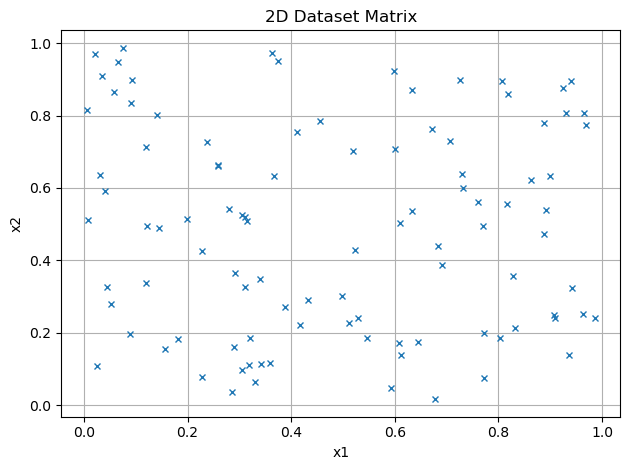

In [41]:
plt.figure()
plt.plot(
    x_data_mat[:, 0],       # x-coordinates
    x_data_mat[:, 1],       # y-coordinates
    'x',                    # x marker
    markersize=5,           
    linestyle=''            # no line between points
)
plt.title("2D Dataset Matrix")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.tight_layout()         
plt.show()

In [90]:
mean_vec = np.mean(x_data_mat, axis=0)
x_centered = x_data_mat - mean_vec
print ("New means:", np.mean(x_centered, axis=0)) # should be almost 0

New means: [3.07007753e-16 4.02058886e-15]


In [43]:
alpha = np.radians(30)
c, s = np.cos(alpha), np.sin(alpha)
r_rot_mat = [[c, s],[-s, c]]
print(r_rot_mat)

[[0.8660254037844387, 0.49999999999999994], [-0.49999999999999994, 0.8660254037844387]]


In [44]:
R_arr = np.array(r_rot_mat)
print(R_arr)

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


In [45]:
# Rotating the points using the dot product
x_rotated = x_centered.dot(R_arr)
print(x_rotated[:5])

[[-0.32410791  0.34836372]
 [ 0.1614841   0.22220134]
 [-0.11599316 -0.44914455]
 [-0.5558982   0.11692327]
 [-0.00656743  0.25151726]]


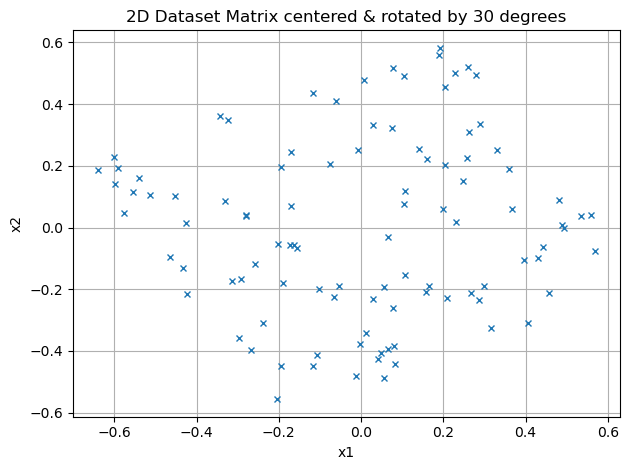

In [46]:
plt.figure()
plt.plot(
    x_rotated[:, 0],       # x-coordinates
    x_rotated[:, 1],       # y-coordinates
    'x',                    # x marker
    markersize=5,           
    linestyle=''            # no line between points
)
plt.title("2D Dataset Matrix centered & rotated by 30 degrees")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.tight_layout()         
plt.show()

### Let's repeat this but this time we'll compare the variance with different angles

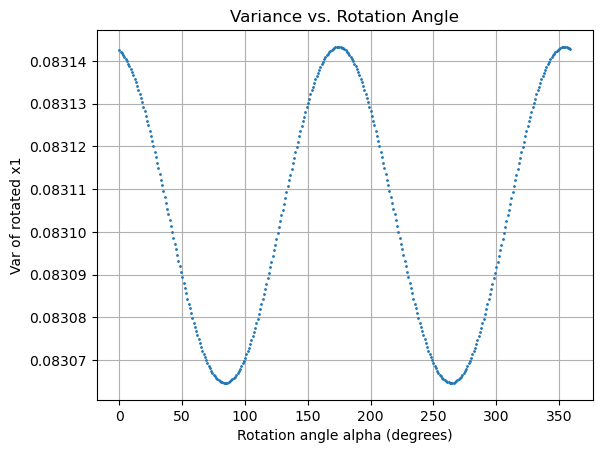

Maximum variance at alpha = 174 degrees


In [60]:
def variance_over_angles(x_centered, angles=None):
    """
    Compute Var(x1) for each rotation angle in `angles`.
    Returns (angles_array, variances_array).
    """
    if angles is None:
        angles = np.arange(0, 360)
    angles = np.array(angles)
    # Preallocating a float array of the same shape as angles
    # so we can efficiently fill in each variance without growing a list
    variances = np.empty_like(angles, dtype=float)

    for i, theta in enumerate(angles):
        alpha = np.radians(theta)      
        c, s = np.cos(alpha), np.sin(alpha)
        R_arr = np.array([[c,  s],
                          [-s, c]])
        x_rotated = x_centered.dot(R_arr)
        variances[i] = np.var(x_rotated[:, 0])

    return angles, variances
#repeating the centering
mean_vec   = np.mean(x_data_mat, axis=0)
x_centered = x_data_mat - mean_vec

#Calling the function to get all variances at once
angles, vars_x1 = variance_over_angles(x_centered)

# Plotting the curve
plt.plot(angles, vars_x1, 'o', markersize=1)
plt.xlabel("Rotation angle alpha (degrees)")
plt.ylabel("Var of rotated x1")
plt.title("Variance vs. Rotation Angle")
plt.grid(True)
plt.show()

# 4) Find & print the best angle
best_angle = angles[np.argmax(vars_x1)]
print(f"Maximum variance at alpha = {best_angle} degrees")

n = 100
  best angles: [294 125 198  92 161 297  50  42  38 163]
  min =  38, mean = 146.0, max = 297

n = 1000
  best angles: [155 263  23 114  77 101  31 119   2  99]
  min =   2, mean = 98.4, max = 263

n = 10000
  best angles: [ 49  49  77  71 187  55 205 217  56  23]
  min =  23, mean = 98.9, max = 217

n = 100000
  best angles: [123 101 112  75  44 148 227  38 170 174]
  min =  38, mean = 121.2, max = 227



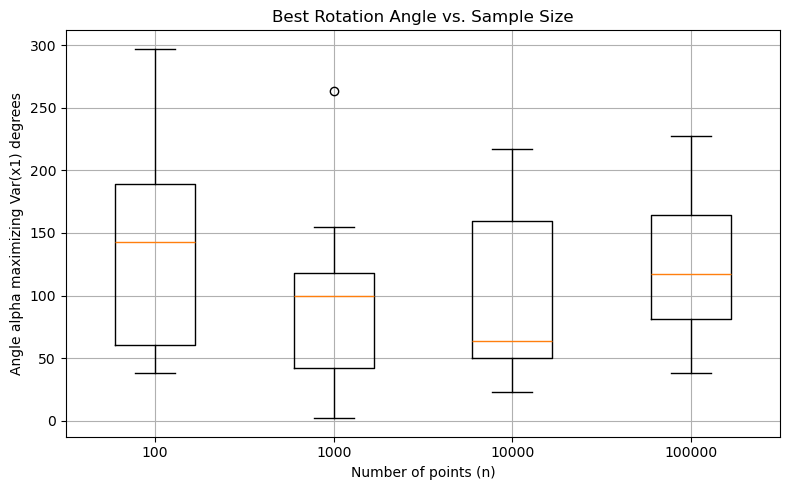

In [51]:
ns = [100, 1000, 10000, 100000]
repeats = 10
seed_base = 42

# the best angles for n_points will be held in this dictionary
best_angles = {n: [] for n in ns}

# Looping over each sample size
for n_points in ns:
    for rep in range(repeats):
        rng = np.random.default_rng(seed_base + rep)
        x_data_mat = rng.random((n_points, n_dims))
        mean_vec   = np.mean(x_data_mat, axis=0)
        x_centered = x_data_mat - mean_vec

        #computing Var(x1) against the angle
        angles = np.arange(0, 360)   # degrees
        vars   = []                  # will store var(x1) for each angle
        for alpha in angles:
            alpha     = np.radians(alpha)
            c, s      = np.cos(alpha), np.sin(alpha)
            R_arr     = np.array([[c,  s],
                                  [-s, c]])
            x_rotated = x_centered.dot(R_arr)
            var_x1    = np.var(x_rotated[:, 0])
            vars.append(var_x1)
        vars = np.array(vars)

        #recording best angle for this replicate
        best = angles[np.argmax(vars)]
        best_angles[n_points].append(best)

#summary for each n_points
for n_points, alist in best_angles.items():
    arr = np.array(alist)
    print(f"n = {n_points}")
    print(f"  best angles: {arr}")
    print(f"  min = {arr.min():3d}, mean = {arr.mean():.1f}, max = {arr.max():3d}\n")

# 5) Box-plot of best angles by sample size
plt.figure(figsize=(8,5))
plt.boxplot([best_angles[n] for n in ns], labels=ns)
plt.xlabel("Number of points (n)")
plt.ylabel("Angle alpha maximizing Var(x1) degrees")
plt.title("Best Rotation Angle vs. Sample Size")
plt.grid(True)
plt.tight_layout()
plt.show()

### As `n` increases, the spread of “best” angles narrows, larger samples produce a tighter (though still random) peak in sample variance.

### The direction along which Var(x1) is **maximal** is the eigenvector belonging to the larger eigenvalue. If that eigenvector is V= [ Vx, Vy]  then the rotation angle alpha is arctan(Vy/Vx) 


In [64]:
c_cov_mat = np.cov(x_data_mat, bias = True, rowvar = False)
print(c_cov_mat)

[[8.31424327e-02 8.06079299e-06]
 [8.06079299e-06 8.30655062e-02]]


### np.cov: Estimate a covariance matrix, given data and weights.
- Parameters :
  * rowvar: If rowvar is True (default), then each row represents a variable, with observations in the columns. Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.
  * bias: Default normalization (False) is by `(N - 1)`, where N is the number of observations given (unbiased estimate). If bias is True, then normalization is by N.

[source](https://numpy.org/devdocs/reference/generated/numpy.cov.html) 

##### The normalization for C would be, $\frac{1}{N}$ instead of $\frac{1}{N-1}$ so ->
$$
C_{ij} = \frac{1}{N}\sum_{k=1}^{N}(X_{i} - mean_{i})(X_{j} - mean_{j})
$$

In [74]:
#eigen decomposition
eigs, vecs = np.linalg.eig(c_cov_mat)
print(eigs, vecs)

[0.08314327 0.08306467] [[ 0.99467026 -0.10310714]
 [ 0.10310714  0.99467026]]


In [75]:
# finding the index for the largest eigenvalue
idx_max = np.argmax(eigs)
print(idx_max)

0


In [83]:
# this eigenvector is the maximizer of V^T C V
dir_vec = vecs[:, idx_max]

In [84]:
dir_vec = dir_vec / np.linalg.norm(dir_vec)

In [88]:
print("v =", dir_vec)

v = [0.99467026 0.10310714]


In [89]:
alpha = np.degrees(np.arctan2(dir_vec[1], dir_vec[0]))
if alpha < 0:
    alpha += 360

print("Angle alpha = {:.1f}°".format(alpha))

Angle alpha = 5.9°


##### maximizing the sample variance of the rotated x axis projection `(cosalpha + sinalpha)` is exactly the same as maximizing the quadratic form `V^T C V` over all unit vectors v.
##### And a standard result from linear algebra tells us that this maximum occurs when v is the eigenvector of C with the largest eigenvalue. Here V is `(cosalpha + sinalpha)^T`, so `V^T C V` computes the variance in that direction